##1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score

2. Load Dataset

In [3]:
df = pd.read_csv("coursera_course_2024.csv")

3. Initial Data Exploration 

In [4]:
df.head()

,Unnamed: 0,title,enrolled,rating,num_reviews,Instructor,Organization,Skills,Description,Modules/Courses,Level,Schedule,URL,Satisfaction Rate
0,0,Analytical Solutions to Common Healthcare Prob...,"5,710",4.6,27,Brian Paciotti,"University of California, Davis",[],"In this course, we’re going to go over analyti...",4 modules,Intermediate level,10 hours to complete (3 weeks at 3 hours a week),https://www.coursera.org/learn/analytical-solu...,NaN
1,1,Understanding Einstein: The Special Theory of ...,"170,608",4.9,3061,Larry Randles Lagerstrom,Stanford University,[],In this course we will seek to “understand Ein...,8 modules,Beginner level,NaN,https://www.coursera.org/learn/einstein-relati...,98%
2,2,JavaScript for Beginners Specialization,"37,762",4.7,772,William Mead,"University of California, Davis","['web interactivty', 'Jquery', 'Data Manipulat...",This Specialization is intended for the learne...,4 course series,Beginner level,2 months (at 10 hours a week),https://www.coursera.org/specializations/javas...,NaN
3,3,"Security, Compliance, and Governance for AI So...",Enrollment number not found,Rating not found,2024,AWS Instructor,Amazon Web Services,[],This course helps you understand some common i...,1 module,Beginner level,1 hour to complete,https://www.coursera.org/learn/security-compli...,NaN
4,4,Understanding Fitness Programming,Enrollment number not found,Rating not found,NaN,Casey DeJong,National Academy of Sports Medicine,"['Cardiovascular training', 'Resistance traini...","In this course, you will learn to identify app...",5 modules,Beginner level,27 hours to complete (3 weeks at 9 hours a week),https://www.coursera.org/learn/understanding-f...,NaN


In [3]:
df.shape

(6646, 14)

In [4]:
df.info

<bound method DataFrame.info of      Unnamed: 0                                              title  \
0             0  Analytical Solutions to Common Healthcare Prob...   
1             1  Understanding Einstein: The Special Theory of ...   
2             2            JavaScript for Beginners Specialization   
3             3  Security, Compliance, and Governance for AI So...   
4             4                  Understanding Fitness Programming   
...         ...                                                ...   
6641       6640                                    Pre-formulation   
6642       6641                           Responsible AI Practices   
6643       6642  Build Website with HTML, JavaScript, AngularJS...   
6644       6643                       Graph Analytics for Big Data   
6645       6644                      Optimizing Diversity on Teams   

                         enrolled            rating num_reviews  \
0                           5,710               4.6         

In [24]:
df.describe()

,enrolled_clean,rating_clean,reviews_clean
count,4.887000e+03,5209.000000,5253.00000
mean,5.950718e+04,4.624131,1631.30059
std,1.789100e+05,0.254316,8235.71010
min,1.500000e+03,3.000000,1.00000
25%,5.504000e+03,4.600000,45.00000
50%,1.633900e+04,4.700000,199.00000
75%,4.868750e+04,4.800000,853.00000
max,4.780567e+06,5.000000,229371.00000


4. Data Cleaning

In [5]:
df = df.drop_duplicates()

In [7]:
df['enrolled_clean'] = clean_numeric(df['enrolled'])
df['rating_clean'] = clean_numeric(df['rating'])
df['reviews_clean'] = clean_numeric(df['num_reviews'])

In [8]:
df[['enrolled_clean', 'rating_clean', 'reviews_clean']].isna().sum()

enrolled_clean    1759
rating_clean      1437
reviews_clean     1393
dtype: int64

In [9]:
df['rating_clean'].fillna(df['rating_clean'].mean(), inplace=True)
df['enrolled_clean'].fillna(df['enrolled_clean'].median(), inplace=True)
df['reviews_clean'].fillna(df['reviews_clean'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14088\2801516942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_clean'].fillna(df['rating_clean'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14088\2801516942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [10]:
df[['enrolled_clean', 'rating_clean', 'reviews_clean']].isna().sum()

enrolled_clean    0
rating_clean      0
reviews_clean     0
dtype: int64

5. Feature Selection for K-Means Clustering

In [20]:
X= df[['rating_clean', 'enrolled_clean', 'reviews_clean']]

6. Feature Scaling

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

7. Apply K-Means Clustering

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [23]:
df['Cluster'] = clusters

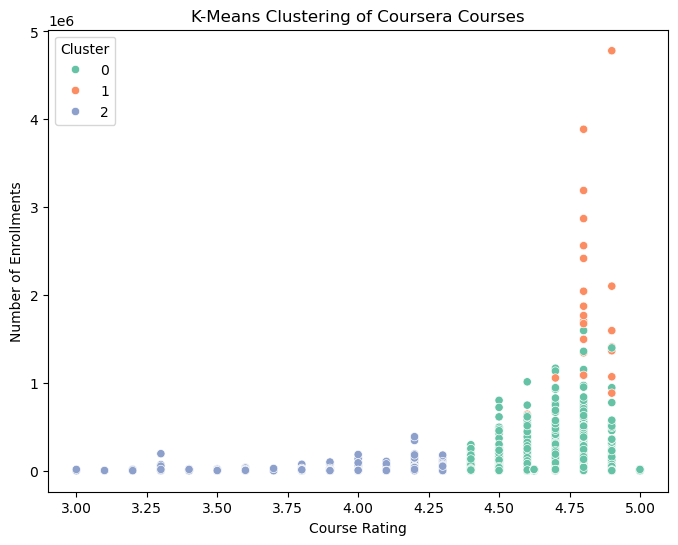

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['rating_clean'],
    y=df['enrolled_clean'],
    hue=df['Cluster'],
    palette='Set2'
)

plt.xlabel("Course Rating")
plt.ylabel("Number of Enrollments")
plt.title("K-Means Clustering of Coursera Courses")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14088\1281908894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


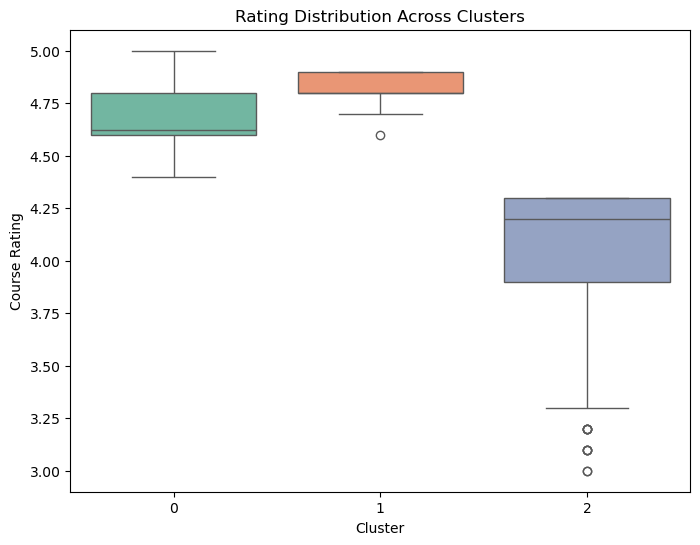

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x='Cluster',
    y='rating_clean',
    data=df,
    palette='Set2'
)

plt.xlabel("Cluster")
plt.ylabel("Course Rating")
plt.title("Rating Distribution Across Clusters")
plt.show()

In [19]:
df.groupby('Cluster')[['rating_clean', 'enrolled_clean']].mean()

,rating_clean,enrolled_clean
Cluster,,
0,4.55130,22934.258382
1,4.77025,77216.901797
2,3.84086,15716.021505


In [7]:
features.describe()

,enrolled_clean,rating_clean,reviews_clean
count,4.778000e+03,4778.000000,4778.000000
mean,6.080790e+04,4.623399,1788.241314
std,1.807296e+05,0.246891,8619.243708
min,1.504000e+03,3.000000,8.000000
25%,5.969500e+03,4.600000,65.000000
50%,1.704800e+04,4.700000,254.000000
75%,4.971000e+04,4.800000,998.750000
max,4.780567e+06,5.000000,229371.000000


In [26]:
X_supervised = df[['enrolled_clean', 'reviews_clean']]
y = df['high_rating']

KeyError: 'high_rating'

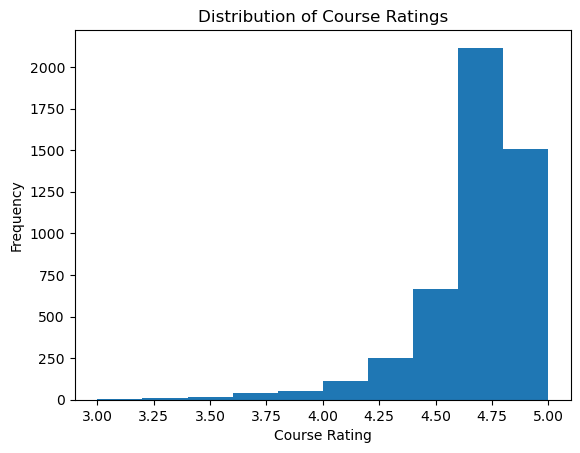

In [8]:
plt.figure()
plt.hist(features['rating_clean'])
plt.xlabel("Course Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Course Ratings")
plt.show()

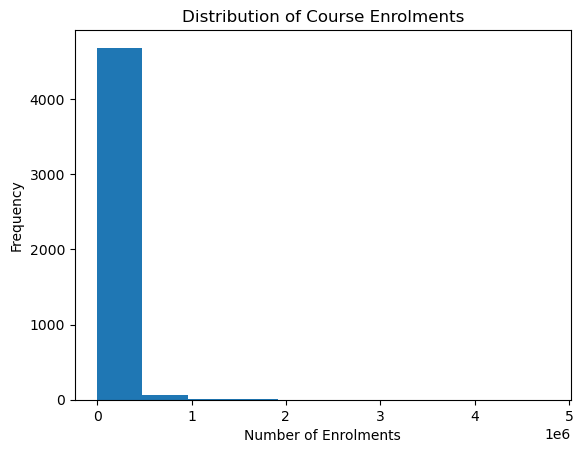

In [9]:
plt.figure()
plt.hist(features['enrolled_clean'])
plt.xlabel("Number of Enrolments")
plt.ylabel("Frequency")
plt.title("Distribution of Course Enrolments")
plt.show()

In [10]:
features['recommend'] = (features['rating_clean'] >= 4.5).astype(int)
features['recommend'].value_counts()

recommend
1    4060
0     718
Name: count, dtype: int64

In [11]:
X = features[['enrolled_clean', 'reviews_clean']]
y = features['recommend']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred_lr = log_model.predict(X_test)

precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

precision_lr, recall_lr, f1_lr


(0.8619246861924686, 1.0, 0.9258426966292135)

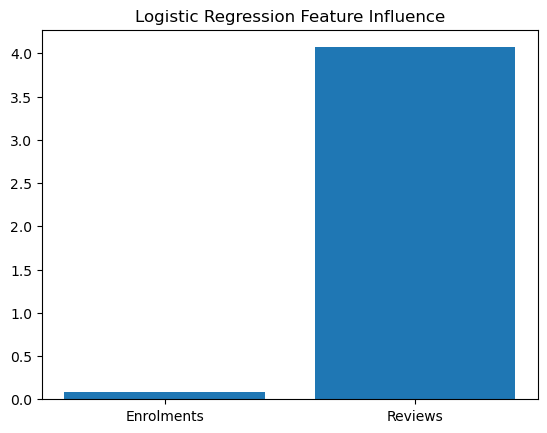

In [15]:
plt.figure()
plt.bar(['Enrolments', 'Reviews'], log_model.coef_[0])
plt.title("Logistic Regression Feature Influence")
plt.show()

In [16]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

precision_dt = precision_score(y_test, dt_pred)
recall_dt = recall_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred)

precision_dt, recall_dt, f1_dt


(0.863013698630137, 0.9939320388349514, 0.9238578680203046)

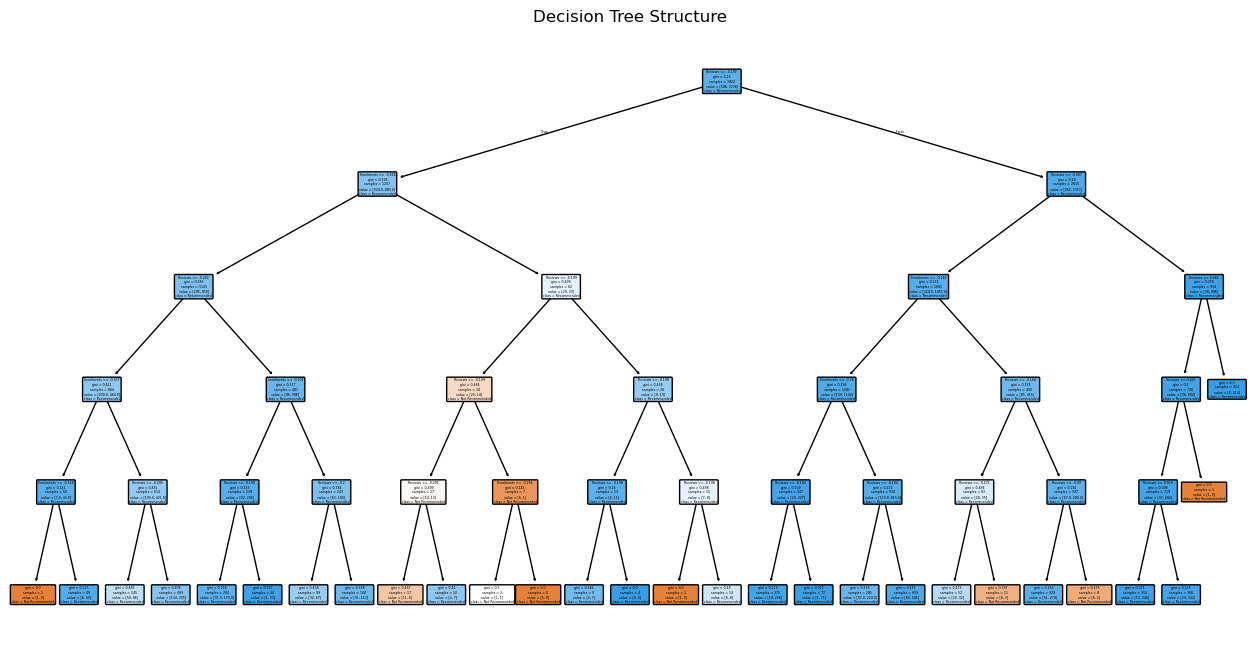

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(
    dt_model,
    feature_names=['Enrolments', 'Reviews'],
    class_names=['Not Recommended', 'Recommended'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Structure")
plt.show()

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)

precision_rf, recall_rf, f1_rf


(0.8716216216216216, 0.9393203883495146, 0.9042056074766355)

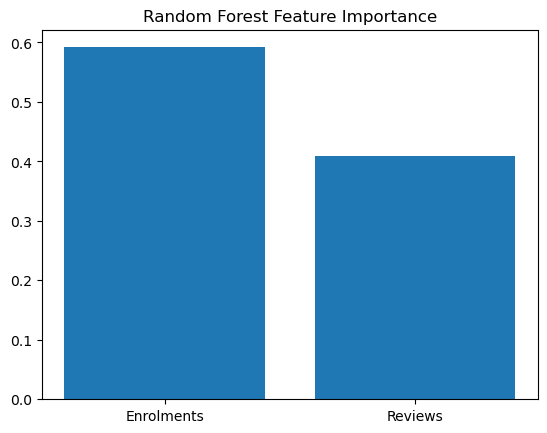

In [19]:
plt.figure()
plt.bar(['Enrolments', 'Reviews'], rf_model.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()

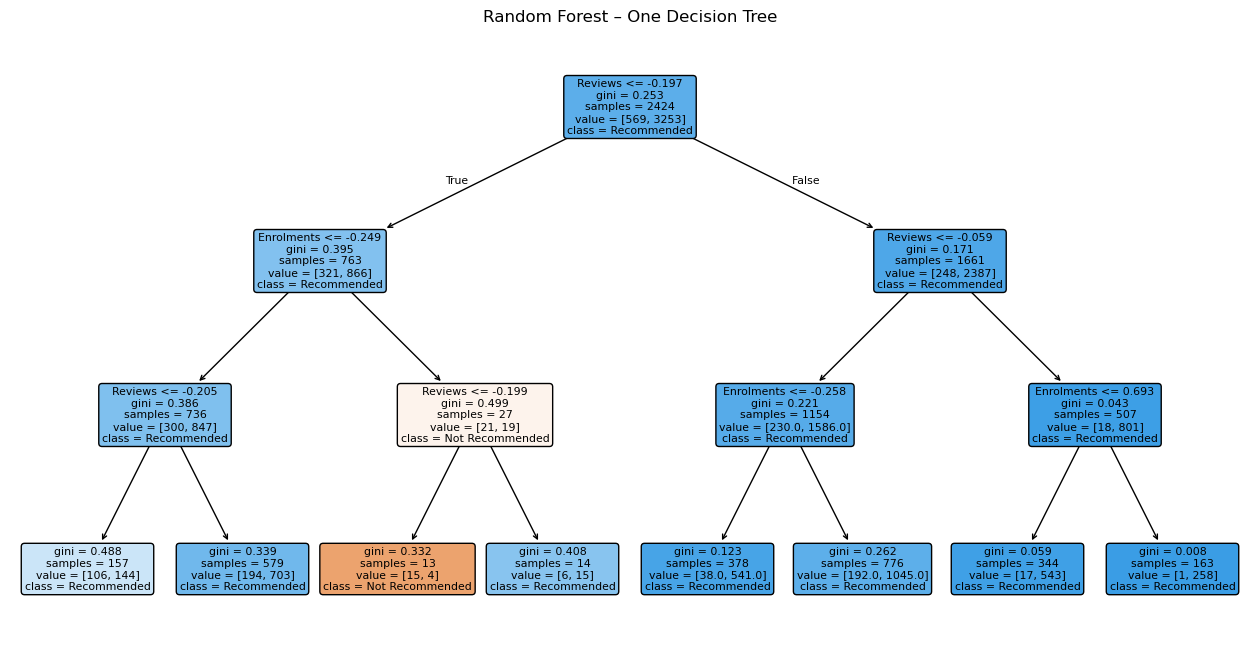

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Visualize the FIRST tree in the forest
plt.figure(figsize=(16, 8))
plot_tree(
    rf_model.estimators_[0],
    feature_names=['Enrolments', 'Reviews'],
    class_names=['Not Recommended', 'Recommended'],
    filled=True,
    rounded=True
)
plt.title("Random Forest – One Decision Tree")
plt.show()

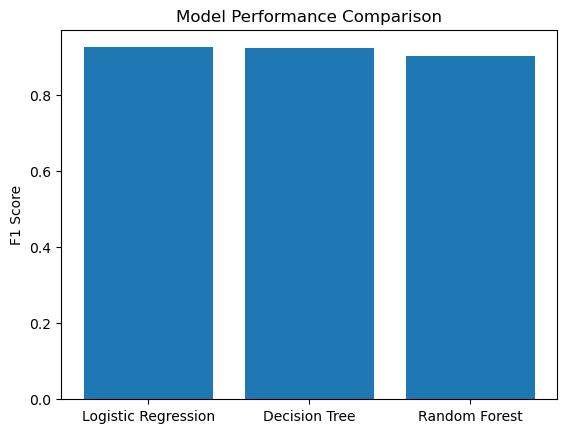

In [20]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
f1_scores = [f1_lr, f1_dt, f1_rf]

plt.figure()
plt.bar(models, f1_scores)
plt.ylabel("F1 Score")
plt.title("Model Performance Comparison")
plt.show()


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

features['cluster'] = clusters

C:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Lenovo\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^

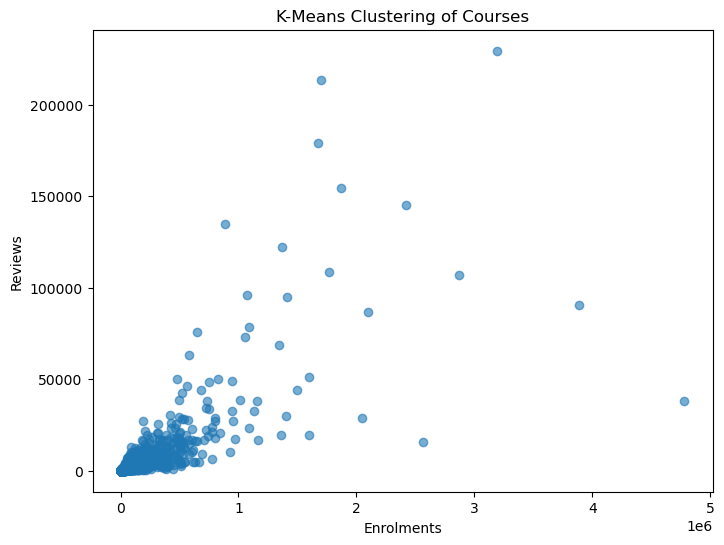

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(features['enrolled_clean'], features['reviews_clean'], alpha=0.6)
plt.xlabel("Enrolments")
plt.ylabel("Reviews")
plt.title("K-Means Clustering of Courses")
plt.show()

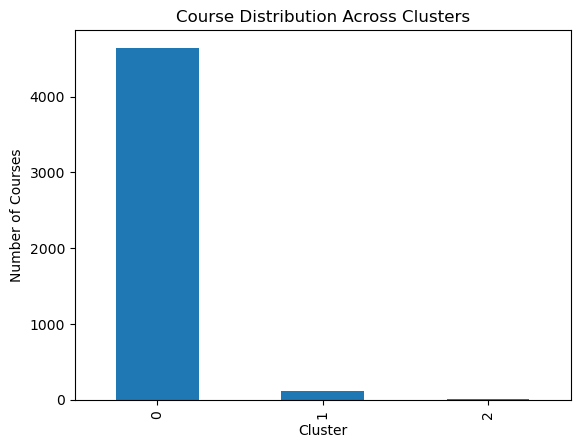

In [23]:
features['cluster'].value_counts().plot(kind='bar')
plt.xlabel("Cluster")
plt.ylabel("Number of Courses")
plt.title("Course Distribution Across Clusters")
plt.show()

In [31]:

plt.figure()
plt.scatter(
    features['rating'],
    features['enrolled'],
    c=features['cluster']
)
plt.xlabel("Rating")
plt.ylabel("Enrolled Students")
plt.title("Coursera Courses Clustering (2024)")
plt.show()

KeyError: 'rating'

<Figure size 640x480 with 0 Axes>